In [ ]:
#**Importing libraries
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
import seaborn as sns
import datetime as dt
import io

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# For the tree visualization
import pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO


from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# For validation
from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:
df = pd.read_csv("train.csv")


In [ ]:
print(df)

             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

In [ ]:
dataset_columns = list(df.columns)
dataset_columns

['id',
 'log_price',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [ ]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [ ]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [ ]:
df.shape

(74111, 29)

In [ ]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))

In [ ]:
len(amenities_count)

74111

In [ ]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("========================================")
        print("{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

bathrooms :- 200,  dtypes : float64
first_review :- 15864,  dtypes : object
host_has_profile_pic :- 188,  dtypes : object
host_identity_verified :- 188,  dtypes : object
host_response_rate :- 18299,  dtypes : object
host_since :- 188,  dtypes : object
last_review :- 15827,  dtypes : object
neighbourhood :- 6872,  dtypes : object
review_scores_rating :- 16722,  dtypes : float64
thumbnail_url :- 8216,  dtypes : object
zipcode :- 966,  dtypes : object
bedrooms :- 91,  dtypes : float64
beds :- 131,  dtypes : float64


In [ ]:
df.last_review.fillna(method="ffill",inplace=True)
df.host_since.fillna(method="ffill",inplace=True)
df.first_review.fillna(method="ffill",inplace=True)

In [ ]:
print("Missing values in datetime type columns ")
print("last_review :- ",df.last_review.isnull().sum())
print("first review :- ",df.first_review.isnull().sum())
print("host_since :- ",df.host_since.isnull().sum())

Missing values in datetime type columns 
last_review :-  0
first review :-  0
host_since :-  0


In [ ]:
df.bathrooms.isnull().sum()

200

In [ ]:
df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]

number_of_reviews  review_scores_rating
3                      0                   NaN
12                     0                   NaN
15                     0                   NaN
24                     0                   NaN
31                     0                   NaN
...                  ...                   ...
74083                  0                   NaN
74089                  0                   NaN
74095                  0                   NaN
74106                  0                   NaN
74109                  0                   NaN

[15819 rows x 2 columns]

In [ ]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

In [ ]:
df.review_scores_rating.isnull().sum()

0

In [ ]:
df.drop(["thumbnail_url"],axis=1,inplace=True)
df.drop(["zipcode"],axis=1,inplace=True)
df.drop(["host_response_rate"],axis=1,inplace=True)

In [ ]:
df["amenities"] = amenities_count

In [ ]:
df.amenities

0        152
1        218
2        311
3        210
4        174
        ... 
74106      2
74107    224
74108    402
74109    189
74110    279
Name: amenities, Length: 74111, dtype: int64

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].nunique() <= 50 and df[column].dtypes != "float64" and df[column].dtypes != "int64" and df[column].dtypes != "bool":
        categorical_col.append(column)

In [ ]:
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable']

In [ ]:
for i in categorical_col:
    print(i," --> ",df[i].dtypes," --> ",df[i].nunique())

property_type  -->  object  -->  35
room_type  -->  object  -->  3
bed_type  -->  object  -->  5
cancellation_policy  -->  object  -->  5
city  -->  object  -->  6
host_has_profile_pic  -->  object  -->  2
host_identity_verified  -->  object  -->  2
instant_bookable  -->  object  -->  2


In [ ]:
print("The categorical features in the dataset are : \n",categorical_col)

The categorical features in the dataset are : 
 ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
for col in categorical_col:
    print("-----------------------")
    print(col)
    print("Unique value count :- ",df[col].nunique())
    print(df[col].describe())

-----------------------
property_type
Unique value count :-  35
count    74111.000000
mean         5.765973
std          8.617349
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max         34.000000
Name: property_type, dtype: float64
-----------------------
room_type
Unique value count :-  3
count    74111.000000
mean         0.471779
std          0.554599
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: room_type, dtype: float64
-----------------------
bed_type
Unique value count :-  5
count    74111.000000
mean         3.935192
std          0.424104
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: bed_type, dtype: float64
-----------------------
cancellation_policy
Unique value count :-  5
count    74111.000000
mean         1.136336
std          0.854733
min          0.000000
25%          0.000000
50%          

In [ ]:
df.dtypes

id                          int64
log_price                 float64
property_type               int64
room_type                   int64
amenities                   int64
accommodates                int64
bathrooms                 float64
bed_type                    int64
cancellation_policy         int64
cleaning_fee                int64
city                        int64
description                object
first_review               object
host_has_profile_pic        int64
host_identity_verified      int64
host_since                 object
instant_bookable            int64
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
bedrooms                  float64
beds                      float64
dtype: object

In [ ]:
df.corr()

<ipython-input-59-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id  log_price  property_type  room_type  \
id                      1.000000  -0.007178       0.002945   0.005796   
log_price              -0.007178   1.000000       0.048741  -0.607125   
property_type           0.002945   0.048741       1.000000   0.078672   
room_type               0.005796  -0.607125       0.078672   1.000000   
amenities              -0.001295   0.100078       0.119804  -0.090244   
accommodates           -0.005759   0.567574       0.174718  -0.458175   
bathrooms              -0.003951   0.355420       0.258584  -0.115934   
bed_type               -0.003818   0.093780       0.012808  -0.149218   
cancellation_policy    -0.003019   0.131869       0.023837  -0.174317   
cleaning_fee           -0.003059   0.111191       0.035556  -0.213340   
city                    0.003324   0.030913      -0.101186   0.058806   
host_has_profile_pic   -0.002139  -0.011971      -0.009300   0.004208   
host_identity_verified -0.002582   0.023433       0.014268  -0.068139   
instant_bookable        0.002497  -0.044271       0.022528   0.027729   
latitude               -0.003021  -0.002193      -0.301968   0.022201   
longitude              -0.001379  -0.047529      -0.288627   0.030317   
number_of_reviews       0.002945  -0.032470       0.041011  -0.030333   
review_scores_rating   -0.004314  -0.070596       0.018497  -0.078905   
bedrooms               -0.007521   0.473212       0.222593  -0.243435   
beds                   -0.008665   0.442153       0.181335  -0.317388   

                        amenities  accommodates  bathrooms  bed_type  \
id                      -0.001295     -0.005759  -0.003951 -0.003818   
log_price                0.100078      0.567574   0.355420  0.093780   
property_type            0.119804      0.174718   0.258584  0.012808   
room_type               -0.090244     -0.458175  -0.115934 -0.149218   
amenities                1.000000      0.187515   0.120221  0.023528   
accommodates             0.187515      1.000000   0.505632  0.074654   
bathrooms                0.120221      0.505632   1.000000  0.038730   
bed_type                 0.023528      0.074654   0.038730  1.000000   
cancellation_policy      0.215255      0.207242   0.087903  0.038706   
cleaning_fee             0.224424      0.182306   0.053784  0.032604   
city                    -0.097849     -0.102428  -0.076328  0.005397   
host_has_profile_pic     0.007816     -0.011242  -0.011782 -0.001048   
host_identity_verified   0.135393      0.055835   0.012615  0.009307   
instant_bookable         0.096327      0.053093   0.001461  0.027594   
latitude                -0.036155     -0.078309  -0.137959  0.001551   
longitude               -0.061668     -0.085160  -0.135026  0.002134   
number_of_reviews        0.187562      0.041964  -0.041381  0.006444   
review_scores_rating     0.229475      0.050873  -0.025871  0.012147   
bedrooms                 0.128425      0.709258   0.589935  0.054038   
beds                     0.170463      0.810801   0.525591  0.065640   

                        cancellation_policy  cleaning_fee      city  \
id                                -0.003019     -0.003059  0.003324   
log_price                          0.131869      0.111191  0.030913   
property_type                      0.023837      0.035556 -0.101186   
room_type                         -0.174317     -0.213340  0.058806   
amenities                          0.215255      0.224424 -0.097849   
accommodates                       0.207242      0.182306 -0.102428   
bathrooms                          0.087903      0.053784 -0.076328   
bed_type                           0.038706      0.032604  0.005397   
cancellation_policy                1.000000      0.336007 -0.016800   
cleaning_fee                       0.336007      1.000000 -0.019377   
city                              -0.016800     -0.019377  1.000000   
host_has_profile_pic               0.019471      0.017119  0.019877   
host_identity_verified             0.156754      0.160825 -0

In [ ]:
df["cleaning_fee"] = df["cleaning_fee"].astype("int")
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("int")
df["host_identity_verified"] = df["host_identity_verified"].astype("int")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  int64  
 3   room_type               74111 non-null  int64  
 4   amenities               74111 non-null  int64  
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  int64  
 8   cancellation_policy     74111 non-null  int64  
 9   cleaning_fee            74111 non-null  int64  
 10  city                    74111 non-null  int64  
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    74111 non-null  int64  
 14  host_identity_verified  74111 non-null

In [ ]:
#number of null values presen tin each row
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Length: 74111, dtype: int64

In [ ]:
#filling null values with 0
df = df.fillna(0)

In [ ]:
#give no. of non-zero values in each row
df.astype(bool).sum(axis=0)

id                        74111
log_price                 74110
property_type             25108
room_type                 32801
amenities                 74111
accommodates              74111
bathrooms                 73713
bed_type                  73634
cancellation_policy       51566
cleaning_fee              54403
city                      70643
description               74111
first_review              74111
host_has_profile_pic      73885
host_identity_verified    49936
host_since                74111
instant_bookable          19451
last_review               74111
latitude                  74111
longitude                 74111
name                      74111
neighbourhood             67239
number_of_reviews         58292
review_scores_rating      57389
bedrooms                  67305
beds                      73976
dtype: int64

In [ ]:
df.head

<bound method NDFrame.head of              id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0        152             3   
1       6304928   5.129899              0          0        218             7   
2       7919400   4.976734              0          0        311             5   
3      13418779   6.620073             17          0        210             4   
4       3808709   4.744932              0          0        174             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1          2             1   
74107  13281809   5.043425              0          0        224             4   
74108  18688039   5.220356              0          0        402             5   
74109  17045948   5.273000              0          0        189             2   
74110   3534845   4.852030              2          0        279             4  

In [ ]:
df[['property_type', 'log_price']].groupby(['property_type'], as_index=False).mean().sort_values(by='log_price',ascending=False).head(n=10)

property_type  log_price
27             27   5.602600
21             21   5.521461
32             32   5.420951
8               8   5.368424
13             13   5.285391
28             28   5.246118
30             30   5.204399
2               2   5.200865
25             25   5.147467
33             33   5.112427

In [ ]:
# changing the time format to datetime standard format

df["last_review"] = pd.to_datetime(df["last_review"])
df["first_review"] = pd.to_datetime(df["first_review"])
df["host_since"] = pd.to_datetime(df["host_since"])

In [ ]:
df.first_review , df.last_review

(0       2016-06-18
 1       2017-08-05
 2       2017-04-30
 3       2017-04-30
 4       2015-05-12
            ...    
 74106   2016-03-25
 74107   2016-08-15
 74108   2015-01-03
 74109   2015-01-03
 74110   2013-09-05
 Name: first_review, Length: 74111, dtype: datetime64[ns],
 0       2016-07-18
 1       2017-09-23
 2       2017-09-14
 3       2017-09-14
 4       2017-01-22
            ...    
 74106   2017-02-19
 74107   2017-04-15
 74108   2017-09-10
 74109   2017-09-10
 74110   2017-04-30
 Name: last_review, Length: 74111, dtype: datetime64[ns])

In [ ]:
print("Missing values in datetime type columns ")
print("last_review :- ",df.last_review.isnull().sum())
print("first review :- ",df.first_review.isnull().sum())
print("host_since :- ",df.host_since.isnull().sum())

Missing values in datetime type columns 
last_review :-  0
first review :-  0
host_since :-  0


In [ ]:
df.bathrooms.describe()

count    74111.000000
mean         1.231929
std          0.584780
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

In [ ]:
#replacing missing values in bathrooms column with rounded mean value
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].mean()))

In [ ]:
df.bedrooms.describe()

count    74111.000000
mean         1.264239
std          0.852773
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bedrooms, dtype: float64

In [ ]:
#replacing missing values in beds column with 2
df["beds"] = df["beds"].fillna(2.0)

In [ ]:
df

id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0        152             3   
1       6304928   5.129899              0          0        218             7   
2       7919400   4.976734              0          0        311             5   
3      13418779   6.620073             17          0        210             4   
4       3808709   4.744932              0          0        174             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1          2             1   
74107  13281809   5.043425              0          0        224             4   
74108  18688039   5.220356              0          0        402             5   
74109  17045948   5.273000              0          0        189             2   
74110   3534845   4.852030              2          0        279             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
0            1.0         4                    2             1  ...   
1            1.0         4                    2             1  ...   
2            1.0         4                    1             1  ...   
3            1.0         4                    0             1  ...   
4            1.0         4                    1             1  ...   
...          ...       ...                  ...           ...  ...   
74106        1.0         4                    0             0  ...   
74107        2.0         4                    1             1  ...   
74108        1.0         4                    1             1  ...   
74109        1.0         4                    2             1  ...   
74110        1.0         4                    1             0  ...   

       instant_bookable last_review   latitude   longitude  \
0                     0  2016-07-18  40.696524  -73.991617   
1                     1  2017-09-23  40.766115  -73.989040   
2                     1  2017-09-14  40.808110  -73.943756   
3                     0  2017-09-14  37.772004 -122.431619   
4                     1  2017-01-22  38.925627  -77.034596   
...                 ...         ...        ...         ...   
74106                 0  2017-02-19  40.709025  -73.939405   
74107                 0  2017-04-15  33.871549 -118.396053   
74108                 1  2017-09-10  40.706749  -73.942377   
74109                 1  2017-09-10  40.738535  -74.000157   
74110                 0  2017-04-30  33.761096 -118.192409   

                                             name     neighbourhood  \
0                  Beautiful brownstone 1-bedroom  Brooklyn Heights   
1        Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                                The Garden Oasis            Harlem   
3              Beautiful Flat in the Heart of SF!      Lower Haight   
4                      Great studio in midtown DC  Columbia Heights   
...                                           ...               ...   
74106                           one room bushwick      Williamsburg   
74107                Spacious Hermosa 2 BR on PCH     Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg      Williamsburg   
74109        Designer's Apartment in HEART of NYC      West Village   
74110              Cozy Boat at Shoreline Village        Long Beach   

       number_of_reviews review_scores_rating  bedrooms  beds  
0                      2                100.0       1.0   1.0  
1                      6                 93.0       3.0   3.0  
2                     10                 92.0       1.0   3.0  
3                      0                  0.0       2.0   2.0  
4                      4                 40.0       0.0   1.0  
...                  ...                  ...       ...   ...  
74106                  0                  0.0       1.0   1.0  
74107                 16                 93.0       2.0   4.0  
74108                 43 

In [ ]:
df.iloc[1200:1400:2]

id  log_price  property_type  room_type  amenities  accommodates  \
1200   6909460   6.371612             17          0        358             5   
1202  13504747   5.010635              0          1        204             2   
1204   8720488   3.891820              0          1        140             2   
1206  13394184   5.416100              0          0         91             4   
1208    939724   4.828314              0          0        171             4   
...        ...        ...            ...        ...        ...           ...   
1390   9961396   5.686975              0          0        188             1   
1392  16498537   3.688879              0          1        239             2   
1394   2166521   4.553877              0          0         55             3   
1396  20271820   4.234107              0          0        340             3   
1398  13018248   4.174387              0          0        205             2   

      bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
1200        1.5         4                    2             0  ...   
1202        1.5         4                    0             1  ...   
1204        1.0         4                    0             1  ...   
1206        1.0         4                    0             1  ...   
1208        1.0         4                    1             1  ...   
...         ...       ...                  ...           ...  ...   
1390        1.0         4                    0             0  ...   
1392        1.0         4                    2             1  ...   
1394        1.0         4                    2             1  ...   
1396        1.0         4                    2             1  ...   
1398        1.0         4                    1             0  ...   

      instant_bookable last_review   latitude   longitude  \
1200                 1  2017-07-29  38.872848  -76.975546   
1202                 1  2017-07-24  40.766090  -73.993046   
1204                 0  2017-09-29  40.667264  -73.960698   
1206                 0  2017-09-29  37.792181 -122.418561   
1208                 0  2017-09-17  40.676960  -73.952448   
...                ...         ...        ...         ...   
1390                 0  2017-06-07  40.796835  -73.970703   
1392                 0  2017-10-01  40.680202  -73.790142   
1394                 0  2017-10-01  34.034991 -118.284035   
1396                 0  2017-04-16  40.685718  -73.849303   
1398                 0  2016-12-30  34.119156 -118.242139   

                                                   name    neighbourhood  \
1200                       Family Riverfront Full house         Fairlawn   
1202               Hudsonview Terrace in Hell's Kitchen   Hell's Kitchen   
1204             PRIVATE STYLISH ROOM IN GREAT LOCATION    Crown Heights   
1206     2BR Available in Nob Hill! Recently Renovated.         Nob Hill   
1208        Private 1 bedoom only 20 min from Manhattan    Crown Heights   
...                                                 ...              ...   
1390                 Upper West Side Large Private Bdrm  Upper West Side   
1392                                home away from home          Jamaica   
1394                 2 Bedroom 1 Bathroom Apartment USC       West Adams   
1396  Modern & Luxurious 1 Bedroom, close to A/J Tra...       Ozone Park   
1398                     Clean, Homey 1 Bdrm in Atwater    Glassell Park   

      number_of_reviews review_scores_rating  bedrooms  beds  
1200                  0                  0.0       2.0   3.0  
1202                  0                  0.0       1.0   1.0  
1204                  3                100.0       1.0   1.0  
1206                  0                  0.0       2.0   2.0  
1208                  2                100.0       1.0   2.0  
...                 ...                  ...       ...   ...  
1390                  0                  0.0       1.0   1.0  
1392                 12                 71.0       1.0   1.0  
1394     

In [ ]:
#converting data types of the columns
df["cleaning_fee"] = df["cleaning_fee"].astype(int)
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype(int)
df["host_identity_verified"] = df["host_identity_verified"].astype(int)

In [ ]:
#replacing true with 't' and false with 'f'
df.replace(to_replace = "t", value = 1)
df.replace(to_replace = "f", value = 0)



id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0        152             3   
1       6304928   5.129899              0          0        218             7   
2       7919400   4.976734              0          0        311             5   
3      13418779   6.620073             17          0        210             4   
4       3808709   4.744932              0          0        174             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1          2             1   
74107  13281809   5.043425              0          0        224             4   
74108  18688039   5.220356              0          0        402             5   
74109  17045948   5.273000              0          0        189             2   
74110   3534845   4.852030              2          0        279             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
0            1.0         4                    2             1  ...   
1            1.0         4                    2             1  ...   
2            1.0         4                    1             1  ...   
3            1.0         4                    0             1  ...   
4            1.0         4                    1             1  ...   
...          ...       ...                  ...           ...  ...   
74106        1.0         4                    0             0  ...   
74107        2.0         4                    1             1  ...   
74108        1.0         4                    1             1  ...   
74109        1.0         4                    2             1  ...   
74110        1.0         4                    1             0  ...   

       instant_bookable last_review   latitude   longitude  \
0                     0  2016-07-18  40.696524  -73.991617   
1                     1  2017-09-23  40.766115  -73.989040   
2                     1  2017-09-14  40.808110  -73.943756   
3                     0  2017-09-14  37.772004 -122.431619   
4                     1  2017-01-22  38.925627  -77.034596   
...                 ...         ...        ...         ...   
74106                 0  2017-02-19  40.709025  -73.939405   
74107                 0  2017-04-15  33.871549 -118.396053   
74108                 1  2017-09-10  40.706749  -73.942377   
74109                 1  2017-09-10  40.738535  -74.000157   
74110                 0  2017-04-30  33.761096 -118.192409   

                                             name     neighbourhood  \
0                  Beautiful brownstone 1-bedroom  Brooklyn Heights   
1        Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                                The Garden Oasis            Harlem   
3              Beautiful Flat in the Heart of SF!      Lower Haight   
4                      Great studio in midtown DC  Columbia Heights   
...                                           ...               ...   
74106                           one room bushwick      Williamsburg   
74107                Spacious Hermosa 2 BR on PCH     Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg      Williamsburg   
74109        Designer's Apartment in HEART of NYC      West Village   
74110              Cozy Boat at Shoreline Village        Long Beach   

       number_of_reviews review_scores_rating  bedrooms  beds  
0                      2                100.0       1.0   1.0  
1                      6                 93.0       3.0   3.0  
2                     10                 92.0       1.0   3.0  
3                      0                  0.0       2.0   2.0  
4                      4                 40.0       0.0   1.0  
...                  ...                  ...       ...   ...  
74106                  0                  0.0       1.0   1.0  
74107                 16                 93.0       2.0   4.0  
74108                 43 

In [ ]:
df.iloc[1200:1400:2]

id  log_price  property_type  room_type  amenities  accommodates  \
1200   6909460   6.371612             17          0        358             5   
1202  13504747   5.010635              0          1        204             2   
1204   8720488   3.891820              0          1        140             2   
1206  13394184   5.416100              0          0         91             4   
1208    939724   4.828314              0          0        171             4   
...        ...        ...            ...        ...        ...           ...   
1390   9961396   5.686975              0          0        188             1   
1392  16498537   3.688879              0          1        239             2   
1394   2166521   4.553877              0          0         55             3   
1396  20271820   4.234107              0          0        340             3   
1398  13018248   4.174387              0          0        205             2   

      bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
1200        1.5         4                    2             0  ...   
1202        1.5         4                    0             1  ...   
1204        1.0         4                    0             1  ...   
1206        1.0         4                    0             1  ...   
1208        1.0         4                    1             1  ...   
...         ...       ...                  ...           ...  ...   
1390        1.0         4                    0             0  ...   
1392        1.0         4                    2             1  ...   
1394        1.0         4                    2             1  ...   
1396        1.0         4                    2             1  ...   
1398        1.0         4                    1             0  ...   

      instant_bookable last_review   latitude   longitude  \
1200                 1  2017-07-29  38.872848  -76.975546   
1202                 1  2017-07-24  40.766090  -73.993046   
1204                 0  2017-09-29  40.667264  -73.960698   
1206                 0  2017-09-29  37.792181 -122.418561   
1208                 0  2017-09-17  40.676960  -73.952448   
...                ...         ...        ...         ...   
1390                 0  2017-06-07  40.796835  -73.970703   
1392                 0  2017-10-01  40.680202  -73.790142   
1394                 0  2017-10-01  34.034991 -118.284035   
1396                 0  2017-04-16  40.685718  -73.849303   
1398                 0  2016-12-30  34.119156 -118.242139   

                                                   name    neighbourhood  \
1200                       Family Riverfront Full house         Fairlawn   
1202               Hudsonview Terrace in Hell's Kitchen   Hell's Kitchen   
1204             PRIVATE STYLISH ROOM IN GREAT LOCATION    Crown Heights   
1206     2BR Available in Nob Hill! Recently Renovated.         Nob Hill   
1208        Private 1 bedoom only 20 min from Manhattan    Crown Heights   
...                                                 ...              ...   
1390                 Upper West Side Large Private Bdrm  Upper West Side   
1392                                home away from home          Jamaica   
1394                 2 Bedroom 1 Bathroom Apartment USC       West Adams   
1396  Modern & Luxurious 1 Bedroom, close to A/J Tra...       Ozone Park   
1398                     Clean, Homey 1 Bdrm in Atwater    Glassell Park   

      number_of_reviews review_scores_rating  bedrooms  beds  
1200                  0                  0.0       2.0   3.0  
1202                  0                  0.0       1.0   1.0  
1204                  3                100.0       1.0   1.0  
1206                  0                  0.0       2.0   2.0  
1208                  2                100.0       1.0   2.0  
...                 ...                  ...       ...   ...  
1390                  0                  0.0       1.0   1.0  
1392                 12                 71.0       1.0   1.0  
1394     

In [ ]:
df.iloc[:5]

id  log_price  property_type  room_type  amenities  accommodates  \
0   6901257   5.010635              0          0        152             3   
1   6304928   5.129899              0          0        218             7   
2   7919400   4.976734              0          0        311             5   
3  13418779   6.620073             17          0        210             4   
4   3808709   4.744932              0          0        174             2   

   bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
0        1.0         4                    2             1  ...   
1        1.0         4                    2             1  ...   
2        1.0         4                    1             1  ...   
3        1.0         4                    0             1  ...   
4        1.0         4                    1             1  ...   

   instant_bookable last_review   latitude   longitude  \
0                 0  2016-07-18  40.696524  -73.991617   
1                 1  2017-09-23  40.766115  -73.989040   
2                 1  2017-09-14  40.808110  -73.943756   
3                 0  2017-09-14  37.772004 -122.431619   
4                 1  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews review_scores_rating  bedrooms  beds  
0                  2                100.0       1.0   1.0  
1                  6                 93.0       3.0   3.0  
2                 10                 92.0       1.0   3.0  
3                  0                  0.0       2.0   2.0  
4                  4                 40.0       0.0   1.0  

[5 rows x 26 columns]

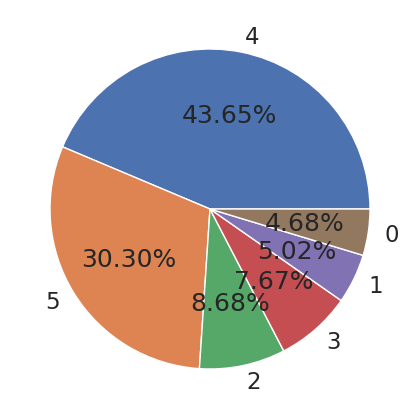

In [ ]:
#percentages of distribution of hotels based on city
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

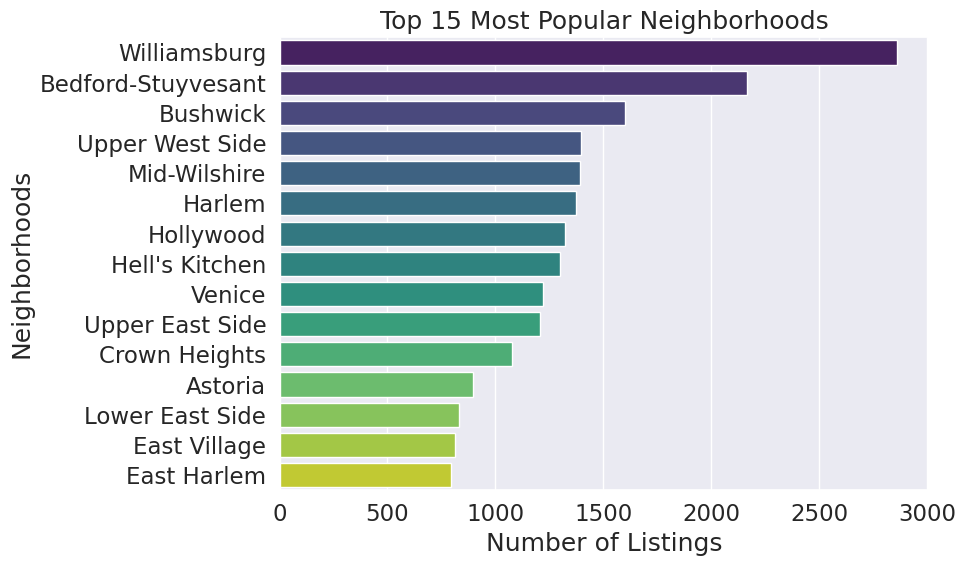

In [ ]:
# Get the top 15 neighborhoods
top_neighborhoods = df['neighbourhood'].value_counts().iloc[1:16]

# Plotting the top 2 to 16 neighborhoods
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette='viridis')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhoods')
plt.title('Top 15 Most Popular Neighborhoods')
plt.tight_layout()
plt.show()


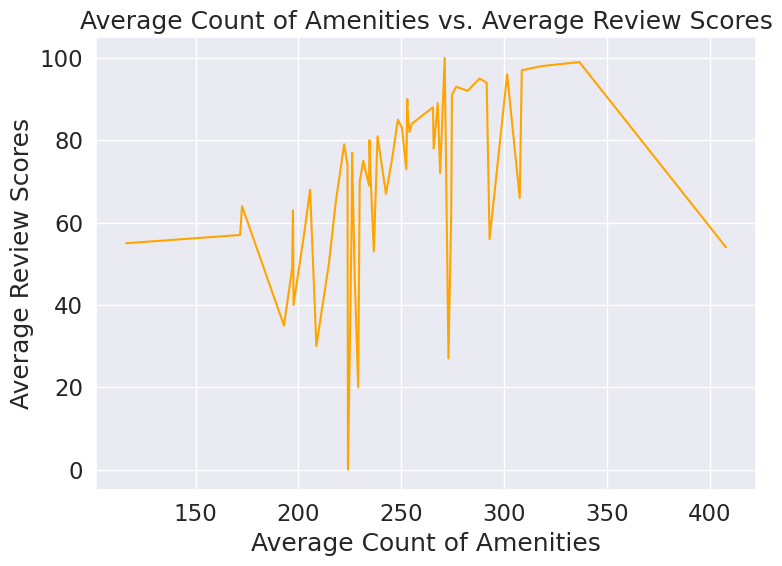

In [ ]:
# Calculate the average count of amenities present and average review scores obtained
avg_amenities_review = df.groupby('review_scores_rating')['amenities'].mean().reset_index()

# Line plot for average count of amenities vs. average review scores
plt.figure(figsize=(8, 6))
sns.lineplot(x='amenities', y='review_scores_rating', data=avg_amenities_review, color='orange')
plt.xlabel('Average Count of Amenities')
plt.ylabel('Average Review Scores')
plt.title('Average Count of Amenities vs. Average Review Scores')
plt.tight_layout()
plt.show()


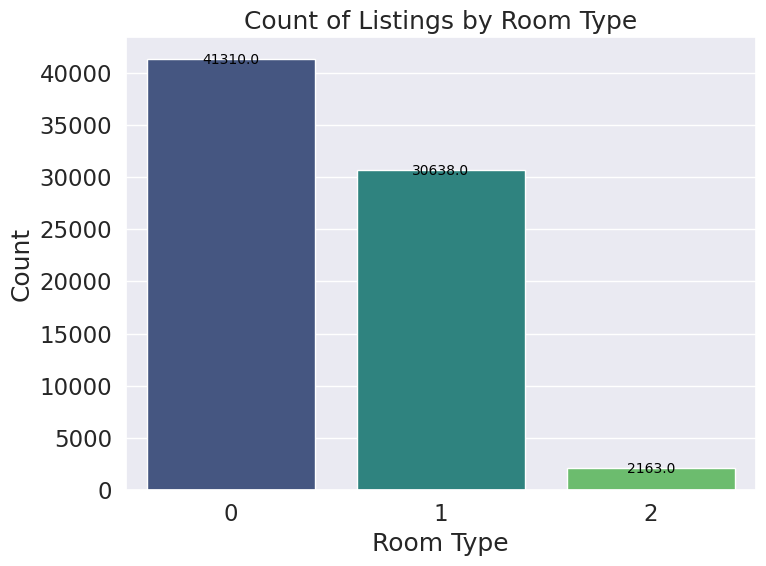

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='viridis')

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

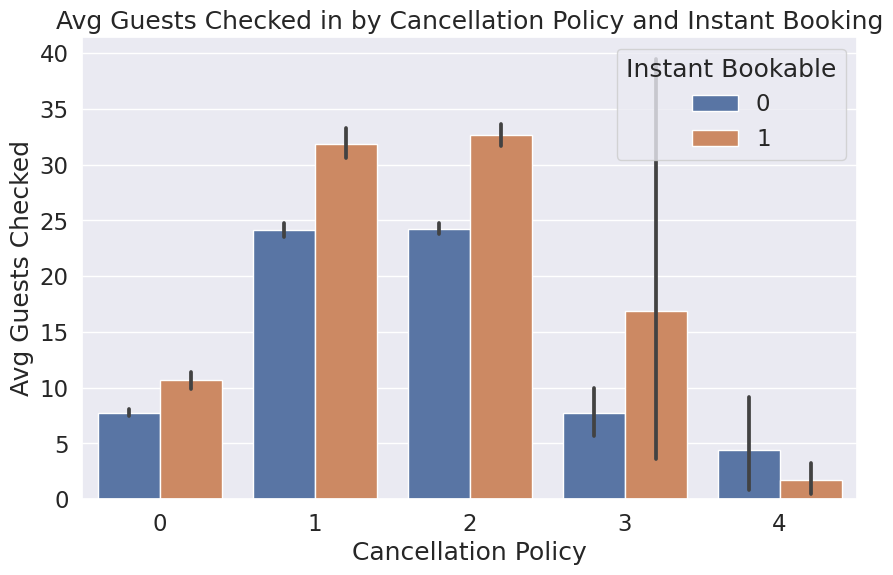

In [ ]:
# Assuming 'cancellation_policy', 'instant_bookable', and 'number of guest checking in' are the relevant columns
# Plotting a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cancellation_policy', y='number_of_reviews', hue='instant_bookable', data=df)
plt.title('Avg Guests Checked in by Cancellation Policy and Instant Booking')
plt.xlabel('Cancellation Policy')
plt.ylabel('Avg Guests Checked')
plt.legend(title='Instant Bookable', loc='upper right')
plt.show()

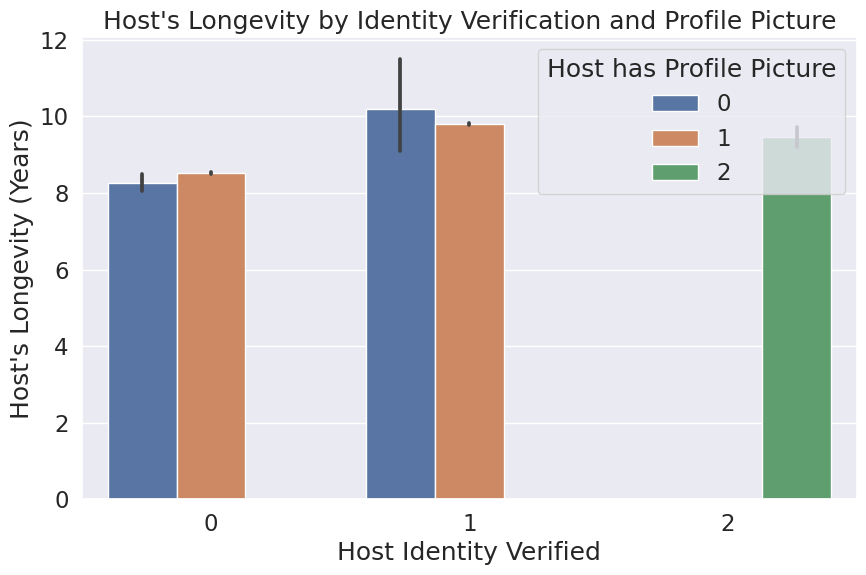

In [ ]:
# Convert 'host_since' to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Calculate host longevity in years
df['host_longevity'] = (pd.to_datetime('today') - df['host_since']).dt.days / 365.25

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='host_identity_verified', y='host_longevity', hue='host_has_profile_pic', data=df)
plt.title("Host's Longevity by Identity Verification and Profile Picture")
plt.xlabel('Host Identity Verified')
plt.ylabel("Host's Longevity (Years)")
plt.legend(title='Host has Profile Picture', loc='upper right')
plt.show()

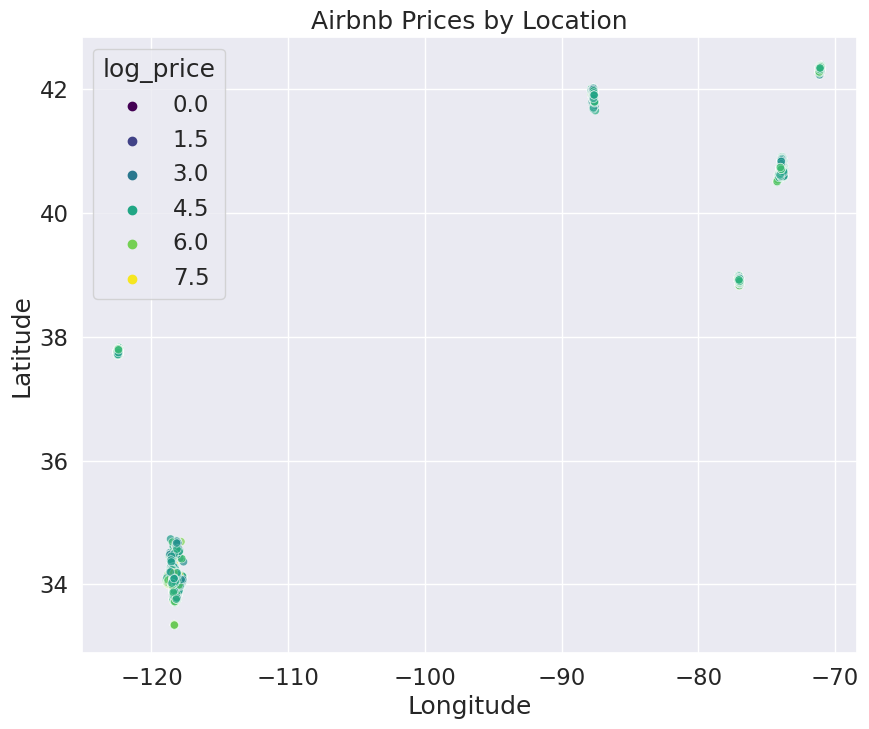

In [ ]:
# Scatter plot to visualize price distribution by location
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', data=df, palette='viridis', alpha=0.7)
plt.title('Airbnb Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


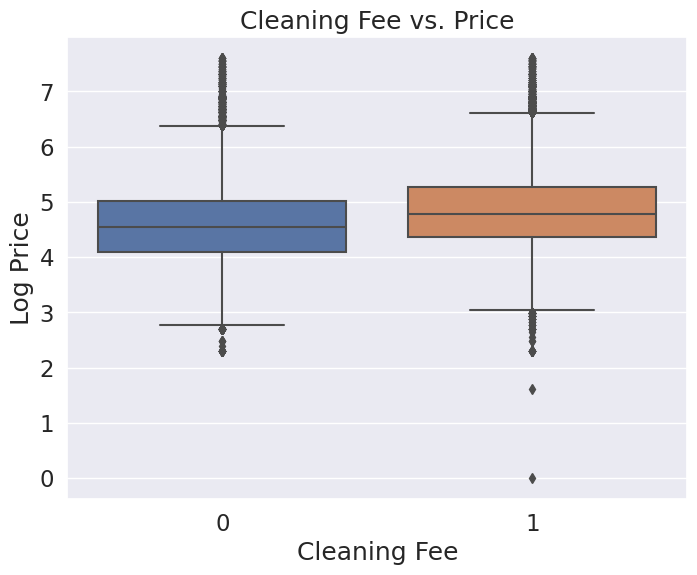

In [ ]:
# Example analysis for cleaning fee impact on pricing
plt.figure(figsize=(8, 6))
sns.boxplot(x='cleaning_fee', y='log_price', data=df)
plt.title('Cleaning Fee vs. Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Log Price')
plt.show()

<ipython-input-41-7de7f8110f51>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='accommodates', y='log_price', hue='room_type', data=df, ci=None)


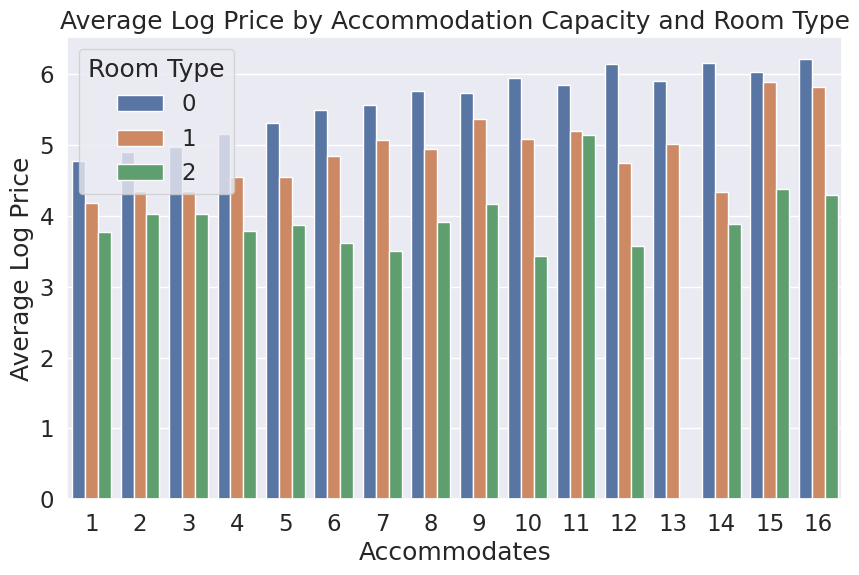

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='log_price', hue='room_type', data=df, ci=None)
plt.title('Average Log Price by Accommodation Capacity and Room Type')
plt.xlabel('Accommodates')
plt.ylabel('Average Log Price')
plt.legend(title='Room Type')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

# Violin plot for host profile completeness impact on log_price
plt.subplot(1, 3, 1)
sns.violinplot(x='host_has_profile_pic', y='log_price', data=df)

# Violin plot for host verification impact on log_price
plt.subplot(1, 3, 2)
sns.violinplot(x='host_identity_verified', y='log_price', data=df)

# Violin plot for host tenure impact on log_price
plt.subplot(1, 3, 3)
sns.violinplot(x=(pd.to_datetime('today') - df['host_since']).dt.days, y='log_price', data=df)
plt.xlabel('Host Tenure (Days)')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()



KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7a05b46b1000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10, 6))

# Bar plot for host profile completeness impact on average log_price
avg_log_price_profile = host_data.groupby('host_has_profile_pic')['log_price'].mean().reset_index()
plt.subplot(1, 2, 1)
sns.barplot(x='host_has_profile_pic', y='log_price', data=avg_log_price_profile)

# Bar plot for host verification impact on average log_price
avg_log_price_verification = host_data.groupby('host_identity_verified')['log_price'].mean().reset_index()
plt.subplot(1, 2, 2)
sns.barplot(x='host_identity_verified', y='log_price', data=avg_log_price_verification)

plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for cancellation policy and pricing
cancellation_columns = ['cancellation_policy', 'log_price']

# Creating a subset DataFrame with selected columns
cancellation_data = df[cancellation_columns]

# Visualizing the relationship between cancellation policy and log_price using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='log_price', data=cancellation_data)
plt.xlabel('Cancellation Policy')
plt.ylabel('Log Price')
plt.title('Association between Cancellation Policy and Log Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-45-b07853c1d6ca>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='bed_type', y='log_price', data=bed_data, ci='sd')  # Use 'sd' for standard deviation or '95' for confidence interval


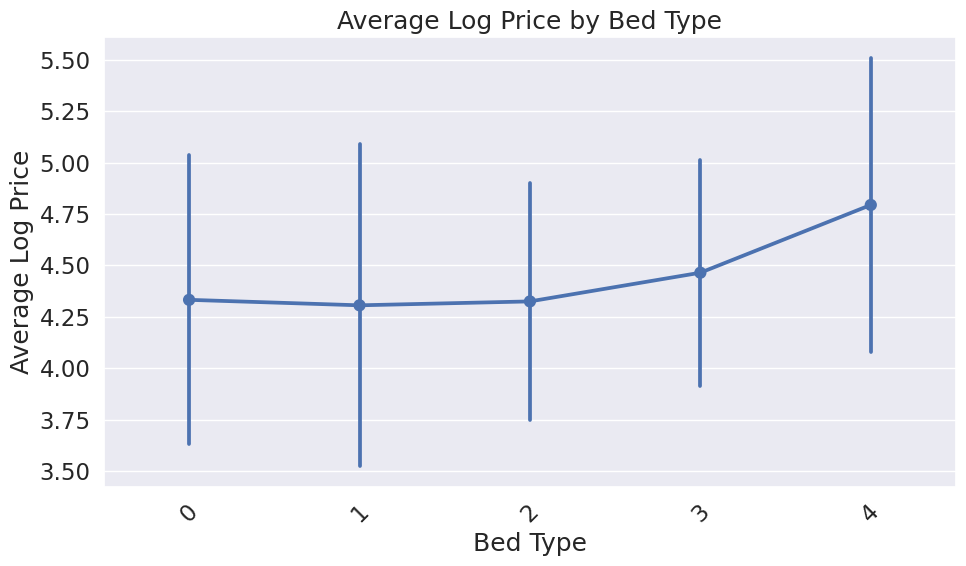

In [ ]:
plt.figure(figsize=(10, 6))
# Selecting relevant columns for bed type and pricing
bed_columns = ['bed_type', 'log_price']

# Creating a subset DataFrame with selected columns
bed_data = df[bed_columns]
sns.pointplot(x='bed_type', y='log_price', data=bed_data, ci='sd')  # Use 'sd' for standard deviation or '95' for confidence interval
plt.xlabel('Bed Type')
plt.ylabel('Average Log Price')
plt.title('Average Log Price by Bed Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


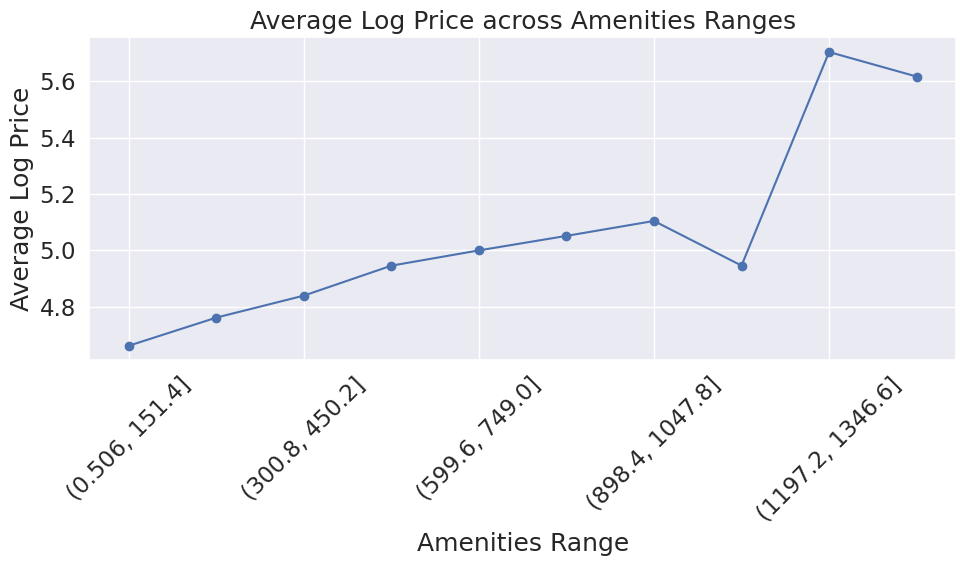

In [ ]:
plt.figure(figsize=(10, 6))
df['amenities_range'] = pd.cut(df['amenities'], bins=10)  # Creating bins for amenities
df.groupby('amenities_range')['log_price'].mean().plot(marker='o')
plt.xlabel('Amenities Range')
plt.ylabel('Average Log Price')
plt.title('Average Log Price across Amenities Ranges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

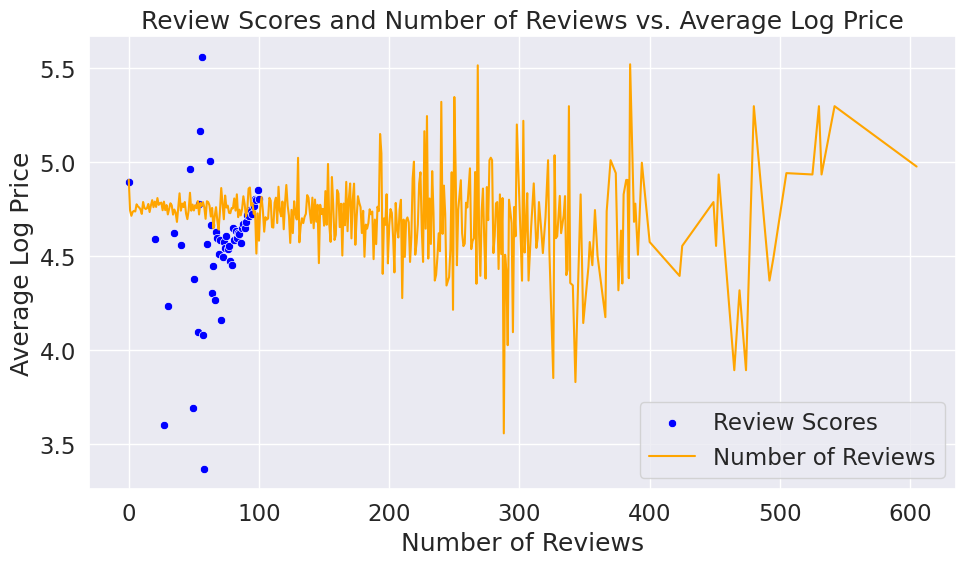

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by average review scores and number of reviews
avg_reviews = df.groupby('review_scores_rating')['log_price'].mean().reset_index()
avg_num_reviews = df.groupby('number_of_reviews')['log_price'].mean().reset_index()

# Scatter plot for review scores vs. log prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='log_price', data=avg_reviews, label='Review Scores', color='blue')
plt.xlabel('Review Scores')
plt.ylabel('Average Log Price')
plt.title('Review Scores and Number of Reviews vs. Average Log Price')
plt.tight_layout()

# Line plot for number of reviews vs. log prices
sns.lineplot(x='number_of_reviews', y='log_price', data=avg_num_reviews, label='Number of Reviews', color='orange')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Log Price')

plt.legend()
plt.tight_layout()
plt.show()


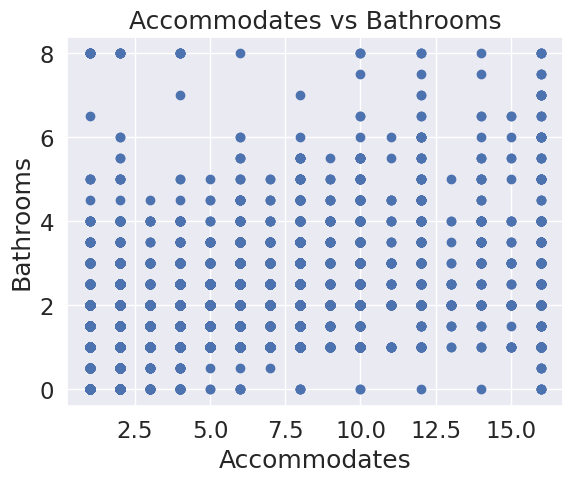

LinearRegression()

In [ ]:
# Define the features (x) and target (y) variables
x = df[["accommodates"]]  # Features (input)
y = df["bathrooms"]       # Target (output)

# Scatter plot
plt.scatter(x, y)
plt.xlabel("Accommodates")
plt.ylabel("Bathrooms")
plt.title("Accommodates vs Bathrooms")
plt.show()

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

# Create a linear regression model
regressor = LinearRegression()

# Fit the model with the training data
regressor.fit(x_train, y_train)

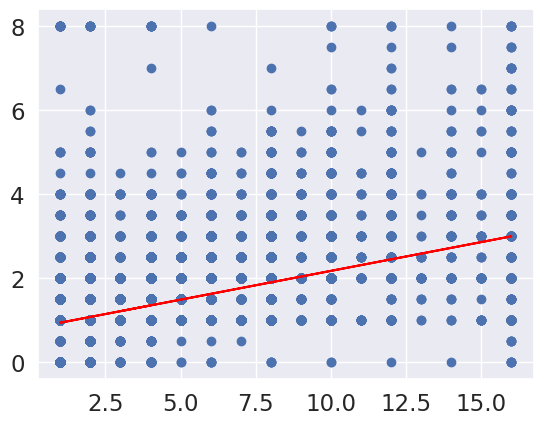

In [ ]:
# Scatter plot
plt.scatter(x="accommodates", y="bathrooms", data=df)

# Linear regression
x = df["accommodates"]
y = df["bathrooms"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define the linear regression function
def myfunc(x):
    return slope * x + intercept

# Create a model using the linear regression function
mymodel = myfunc(x)

# Plot the linear regression line
plt.plot(x, mymodel, color="red")

# Show the plot
plt.show()

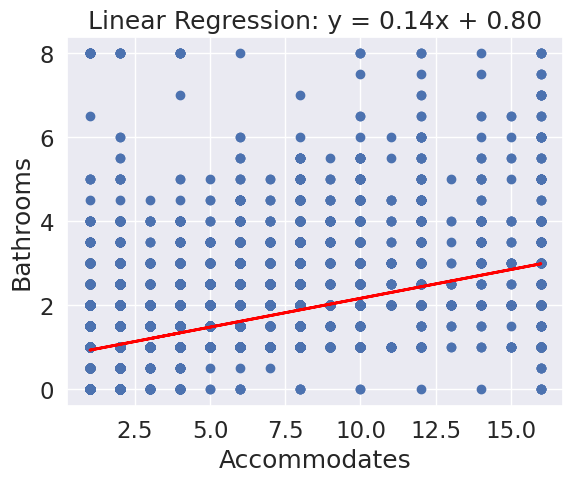

In [ ]:
# Define the features (x) and target (y) variables
x = df["accommodates"].values  # Convert to numeric array
y = df["bathrooms"].values     # Convert to numeric array

# Scatter plot
plt.scatter(x, y)
plt.xlabel("Accommodates")
plt.ylabel("Bathrooms")

# Calculate linear regression parameters
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define the regression line function
def myfunc(x):
    return slope * x + intercept

# Generate y values for the regression line
mymodel = list(map(myfunc, x))

# Plot the regression line
plt.plot(x, mymodel, color='red', linewidth=2)
plt.title(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")

plt.show()

In [ ]:
predicted_response = intercept + slope * x

In [ ]:
 x = df[['id']].values
y = df['log_price'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Now you can train your model on x_train_scaled and make predictions on x_test_scaled
model = LinearRegression().fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [ ]:
X = df.drop('log_price', axis=1)
y = df.log_price

# Splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=12345)

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
ct = make_column_transformer(
(OneHotEncoder(),['beds','instant_bookable','amenities','accommodates','bathrooms','host_identity_verified','host_has_profile_pic','cleaning_fee', 'number_of_reviews','bedrooms' ]), remainder = 'passthrough'
    )

In [ ]:
# Assuming you have an array 'x' that you want to reshape and one-hot encode
# Reshape 'x' into a 2D array with one column
x = x.reshape(-1, 1)

# Import the necessary library for one-hot encoding (e.g., OneHotEncoder from scikit-learn)
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform 'x' to perform one-hot encoding
x_encoded = encoder.fit_transform(x)

# Convert the result to a dense array if needed
x_encoded_array = x_encoded.toarray()

In [ ]:
#****RUN******#

In [ ]:
df

id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0        152             3   
1       6304928   5.129899              0          0        218             7   
2       7919400   4.976734              0          0        311             5   
3      13418779   6.620073             17          0        210             4   
4       3808709   4.744932              0          0        174             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1          2             1   
74107  13281809   5.043425              0          0        224             4   
74108  18688039   5.220356              0          0        402             5   
74109  17045948   5.273000              0          0        189             2   
74110   3534845   4.852030              2          0        279             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  ...  \
0            1.0         4                    2             1  ...   
1            1.0         4                    2             1  ...   
2            1.0         4                    1             1  ...   
3            1.0         4                    0             1  ...   
4            1.0         4                    1             1  ...   
...          ...       ...                  ...           ...  ...   
74106        1.0         4                    0             0  ...   
74107        2.0         4                    1             1  ...   
74108        1.0         4                    1             1  ...   
74109        1.0         4                    2             1  ...   
74110        1.0         4                    1             0  ...   

       last_review   latitude   longitude  \
0       2016-07-18  40.696524  -73.991617   
1       2017-09-23  40.766115  -73.989040   
2       2017-09-14  40.808110  -73.943756   
3       2017-09-14  37.772004 -122.431619   
4       2017-01-22  38.925627  -77.034596   
...            ...        ...         ...   
74106   2017-02-19  40.709025  -73.939405   
74107   2017-04-15  33.871549 -118.396053   
74108   2017-09-10  40.706749  -73.942377   
74109   2017-09-10  40.738535  -74.000157   
74110   2017-04-30  33.761096 -118.192409   

                                             name     neighbourhood  \
0                  Beautiful brownstone 1-bedroom  Brooklyn Heights   
1        Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                                The Garden Oasis            Harlem   
3              Beautiful Flat in the Heart of SF!      Lower Haight   
4                      Great studio in midtown DC  Columbia Heights   
...                                           ...               ...   
74106                           one room bushwick      Williamsburg   
74107                Spacious Hermosa 2 BR on PCH     Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg      Williamsburg   
74109        Designer's Apartment in HEART of NYC      West Village   
74110              Cozy Boat at Shoreline Village        Long Beach   

      number_of_reviews  review_scores_rating bedrooms  beds  amenities_range  
0                     2                 100.0      1.0   1.0   (151.4, 300.8]  
1                     6                  93.0      3.0   3.0   (151.4, 300.8]  
2                    10                  92.0      1.0   3.0   (300.8, 450.2]  
3                     0                   0.0      2.0   2.0   (151.4, 300.8]  
4                     4                  40.0      0.0   1.0   (151.4, 300.8]  
...                 ...                   ...      ...   ...              ...  
74106                 0                   0.0      1.0   1.0   (0.506, 151.4]  
74107                16                  93.0      2.0   4.0   (151.4, 300.8]  
74108                43                  94.0      2.0   2.0   (300.8, 450.2]  
74109

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'amenities_range'],
      dtype='object')

In [ ]:
x=df[['accommodates', 'bathrooms','cleaning_fee','host_has_profile_pic',
       'host_identity_verified','instant_bookable','number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']]

In [ ]:
x


accommodates  bathrooms  cleaning_fee  host_has_profile_pic  \
0                 3        1.0             1                     1   
1                 7        1.0             1                     1   
2                 5        1.0             1                     1   
3                 4        1.0             1                     1   
4                 2        1.0             1                     1   
...             ...        ...           ...                   ...   
74106             1        1.0             0                     1   
74107             4        2.0             1                     1   
74108             5        1.0             1                     1   
74109             2        1.0             1                     1   
74110             4        1.0             0                     1   

       host_identity_verified  instant_bookable  number_of_reviews  \
0                           1                 0                  2   
1                           0                 1                  6   
2                           1                 1                 10   
3                           1                 0                  0   
4                           1                 1                  4   
...                       ...               ...                ...   
74106                       1                 0                  0   
74107                       0                 0                 16   
74108                       1                 1                 43   
74109                       0                 1                  0   
74110                       1                 0                205   

       review_scores_rating  bedrooms  beds  
0                     100.0       1.0   1.0  
1                      93.0       3.0   3.0  
2                      92.0       1.0   3.0  
3                       0.0       2.0   2.0  
4                      40.0       0.0   1.0  
...                     ...       ...   ...  
74106                   0.0       1.0   1.0  
74107                  93.0       2.0   4.0  
74108                  94.0       2.0   2.0  
74109                   0.0       0.0   2.0  
74110                  96.0       1.0   2.0  

[74111 rows x 10 columns]

In [ ]:
y=df['log_price']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4,random_state=101)
#randomstate is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [ ]:
x_train

accommodates  bathrooms  cleaning_fee  host_has_profile_pic  \
34031             2        1.0             0                     1   
49380             1        1.0             1                     1   
14755             2        1.5             0                     1   
58967             1        1.0             0                     1   
66180             3        1.0             1                     1   
...             ...        ...           ...                   ...   
55293             2        1.0             1                     1   
49751             4        1.0             1                     1   
5695              2        1.0             1                     1   
73542             2        1.0             1                     1   
45919             2        1.0             0                     1   

       host_identity_verified  instant_bookable  number_of_reviews  \
34031                       1                 0                  9   
49380                       1                 0                 45   
14755                       0                 0                  0   
58967                       0                 1                308   
66180                       0                 0                 43   
...                       ...               ...                ...   
55293                       1                 0                 23   
49751                       0                 0                  1   
5695                        1                 0                 57   
73542                       1                 0                  3   
45919                       1                 1                173   

       review_scores_rating  bedrooms  beds  
34031                  98.0       1.0   1.0  
49380                  98.0       1.0   1.0  
14755                   0.0       1.0   1.0  
58967                  97.0       1.0   1.0  
66180                  97.0       0.0   2.0  
...                     ...       ...   ...  
55293                  95.0       1.0   1.0  
49751                   0.0       1.0   2.0  
5695                   97.0       1.0   1.0  
73542                  93.0       1.0   2.0  
45919                  89.0       1.0   1.0  

[44466 rows x 10 columns]

In [ ]:
x_test

accommodates  bathrooms  cleaning_fee  host_has_profile_pic  \
22986             2        1.0             1                     1   
58564             2        2.0             1                     1   
44938             2        1.0             1                     1   
68730             2        1.0             1                     1   
32368             3        1.0             1                     1   
...             ...        ...           ...                   ...   
12425             3        1.0             1                     1   
52263             2        1.0             1                     1   
3679              2        1.0             1                     1   
6524              2        1.0             0                     1   
73365             2        1.0             1                     1   

       host_identity_verified  instant_bookable  number_of_reviews  \
22986                       1                 0                  1   
58564                       1                 0                  0   
44938                       0                 0                  0   
68730                       0                 1                  1   
32368                       0                 0                  3   
...                       ...               ...                ...   
12425                       1                 1                 16   
52263                       1                 0                 39   
3679                        1                 1                 12   
6524                        0                 1                  0   
73365                       0                 1                 17   

       review_scores_rating  bedrooms  beds  
22986                   0.0       1.0   1.0  
58564                   0.0       1.0   1.0  
44938                   0.0       4.0   1.0  
68730                 100.0       1.0   1.0  
32368                  93.0       1.0   1.0  
...                     ...       ...   ...  
12425                  99.0       1.0   1.0  
52263                  98.0       1.0   2.0  
3679                   92.0       0.0   1.0  
6524                    0.0       1.0   1.0  
73365                  93.0       0.0   1.0  

[29645 rows x 10 columns]

In [ ]:
y_train

34031    4.488636
49380    4.488636
14755    4.787492
58967    4.430817
66180    4.653960
           ...   
55293    4.174387
49751    5.703782
5695     4.343805
73542    4.905275
45919    4.094345
Name: log_price, Length: 44466, dtype: float64

In [ ]:
y_test

22986    4.174387
58564    6.204558
44938    4.605170
68730    5.010635
32368    3.526361
           ...   
12425    4.787492
52263    4.499810
3679     4.934474
6524     4.007333
73365    4.744932
Name: log_price, Length: 29645, dtype: float64

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
def print_evaluate(true,predicted):
  mae=metrics.mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  #rmse=metrics.root_mean_square_error(true,predicted)
  rmse=np.sqrt(mse)
  r2score=r2_score(true,predicted)
  print("Error/Accuracy Analysis")
  print("mean_absolute_error: ",mae)
  print("mean_square_error: ",mse)
  print("root_mean_square_error: ",rmse)
  print("r2_score: ",r2score)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
print_evaluate(y_test,y_pred)

Error/Accuracy Analysis
mean_absolute_error:  0.4438263589032001
mean_square_error:  0.33066889267689287
root_mean_square_error:  0.5750381662784592
r2_score:  0.3590174736886226


In [ ]:
def final_result(y_test,y_pred):
  dic={"true value of log_price":y_test.values,"predicted log price values":y_pred}
  result=pd.DataFrame(dic)
  return result

final_result(y_test,y_pred).head(1500)

true value of log_price  predicted log price values
0                    4.174387                    4.752642
1                    6.204558                    4.833829
2                    4.605170                    5.081000
3                    5.010635                    4.465773
4                    3.526361                    4.761075
...                       ...                         ...
1495                 5.135798                    4.516503
1496                 4.795791                    4.753134
1497                 6.551080                    5.231469
1498                 4.499810                    4.706163
1499                 5.703782                    4.578604

[1500 rows x 2 columns]

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'amenities_range'],
      dtype='object')

In [ ]:
X= df[['property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']]

In [ ]:
Y = df[['log_price']]

In [ ]:
Y

log_price
0       5.010635
1       5.129899
2       4.976734
3       6.620073
4       4.744932
...          ...
74106   4.605170
74107   5.043425
74108   5.220356
74109   5.273000
74110   4.852030

[74111 rows x 1 columns]

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
#X, Y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
#regr = AdaBoostRegressor(random_state=0, n_estimators=100)
#regr.fit(X, Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
# fiting a CART model to the data
model_ABR = AdaBoostRegressor()

model_ABR.fit(x_train, y_train)
print()
print(model_ABR)






AdaBoostRegressor()


In [ ]:

expected_Y  = y_test
predicted_Y = model_ABR.predict(x_test)

    # summarizing the fit of the model
print()
print(metrics.r2_score(expected_Y, predicted_Y))
print()


0.31421118961289884



In [ ]:
mse = metrics.mean_squared_error(expected_Y, predicted_Y)
print("MSE: " , mse)
print("RMSE: " , np.sqrt(mse))

MSE:  0.3537834765104754
RMSE:  0.5947970044565418


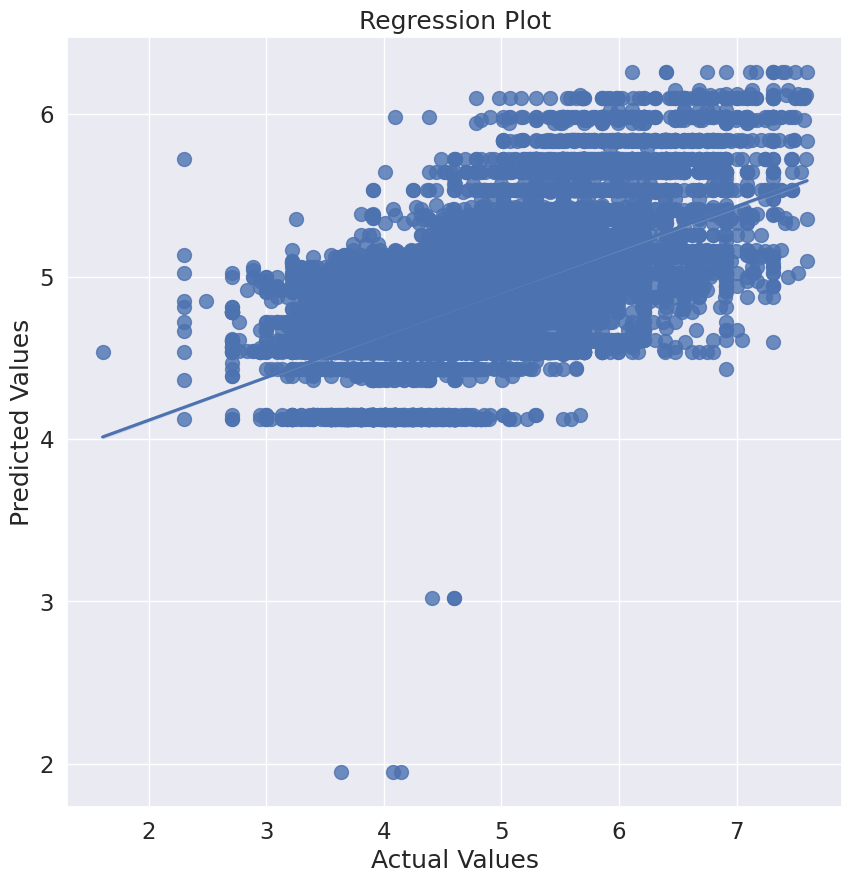

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=predicted_Y, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()

XG BOOST

In [ ]:
x=df[['accommodates', 'bathrooms',
       'cleaning_fee','host_has_profile_pic',
       'host_identity_verified','instant_bookable', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']]
y=df['log_price']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4,random_state=101)
#randomstate is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
xgb_model1 = XGBRegressor(objective ='reg:linear',n_estimators=3000,learning_rate=0.3)
xgb_model1.fit(x_train, y_train ,verbose=False)
y_pred1 = xgb_model1.predict(x_test)
print('r2 score:', metrics.r2_score(y_test, y_pred1))
test_mse1 = metrics.mean_squared_error(y_pred1, y_test)
print('Mean square error:',test_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('RMSE:',test_rmse1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:23:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


r2 score: 0.5604801179082441
Mean square error: 0.22673871245307262
RMSE: 0.47617088576799044


<Axes: xlabel='log_price'>

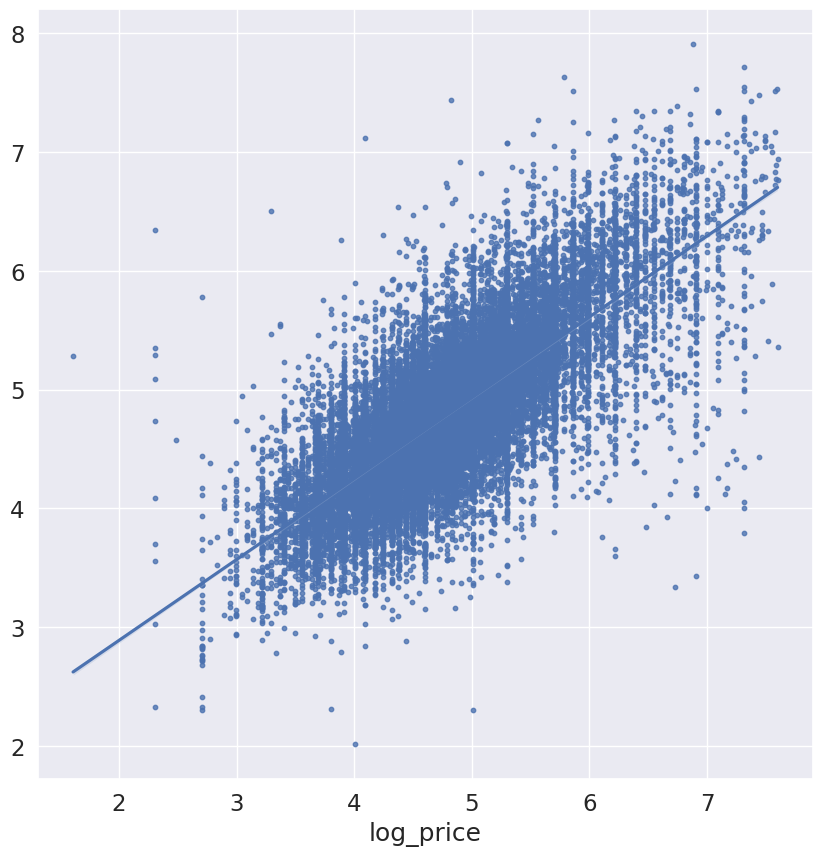

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test,y= y_pred1, fit_reg=True, scatter_kws={"s":10})

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood"],axis = 1)
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [ ]:
X.head(10)

property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0              0          0        152             3        1.0         4   
1              0          0        218             7        1.0         4   
2              0          0        311             5        1.0         4   
3             17          0        210             4        1.0         4   
4              0          0        174             2        1.0         4   
5              0          1        159             2        1.0         4   
6              0          0        284             3        1.0         4   
7             11          0        362             2        1.0         4   
8             17          1        321             2        1.0         4   
9             17          1        225             2        1.0         4   

   cancellation_policy  cleaning_fee  city  host_has_profile_pic  \
0                    2             1     4                     1   
1                    2             1     4                     1   
2                    1             1     4                     1   
3                    0             1     5                     1   
4                    1             1     2                     1   
5                    2             1     5                     1   
6                    1             1     3                     1   
7                    1             1     3                     1   
8                    1             1     5                     1   
9                    1             1     3                     1   

   host_identity_verified  instant_bookable   latitude   longitude  \
0                       1                 0  40.696524  -73.991617   
1                       0                 1  40.766115  -73.989040   
2                       1                 1  40.808110  -73.943756   
3                       1                 0  37.772004 -122.431619   
4                       1                 1  38.925627  -77.034596   
5                       1                 1  37.753164 -122.429526   
6                       0                 1  33.980454 -118.462821   
7                       1                 0  34.046737 -118.260439   
8                       0                 0  37.781128 -122.501095   
9                       0                 1  33.992563 -117.895997   

   number_of_reviews  review_scores_rating  bedrooms  beds amenities_range  
0                  2                 100.0       1.0   1.0  (151.4, 300.8]  
1                  6                  93.0       3.0   3.0  (151.4, 300.8]  
2                 10                  92.0       1.0   3.0  (300.8, 450.2]  
3                  0                   0.0       2.0   2.0  (151.4, 300.8]  
4                  4                  40.0       0.0   1.0  (151.4, 300.8]  
5                  3                 100.0       1.0   1.0  (151.4, 300.8]  
6                 15                  97.0       1.0   1.0  (151.4, 300.8]  
7                  9                  93.0       1.0   1.0  (300.8, 450.2]  
8                159                  99.0       1.0   1.0  (300.8, 450.2]  
9                  2                  90.0       1.0   1.0  (151.4, 300.8]

In [ ]:
from sklearn import metrics

def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true,predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('\nMAE:', mae)
    print('\nMSE:', mse)
    print('\nRMSE:', rmse)
    print('\nR2 Square', r2_square)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
y_pred = lin_reg.predict(X_test)


In [ ]:
print("Error/ Accuracy Analysis :- ")
print_evaluate(y_test,lin_reg.predict(X_test))

Error/ Accuracy Analysis :- 

MAE: 0.3681907697459667

MSE: 0.23500497691406244

RMSE: 0.4847731190093593

R2 Square 0.5423547035439255


In [ ]:
def final_result(y_test,y_pred):
    dic = {"actual_y" : y_test.values, "predicted_y" : y_pred}
    result = pd.DataFrame(dic)
    return result

In [ ]:
final_result(y_test,y_pred).head(10)

actual_y  predicted_y
0  4.174387     4.402203
1  6.204558     5.168217
2  4.605170     5.487669
3  5.010635     4.259523
4  3.526361     4.274571
5  4.605170     4.150292
6  4.077537     4.348130
7  5.010635     5.481971
8  5.298317     4.765719
9  4.094345     4.319334

2) Considering only 2 input features

In [ ]:
X = df[["bathrooms","bedrooms"]]
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
print("Error/Accuracy Analysis :- ")
print_evaluate(y_test,y_pred)

Error/Accuracy Analysis :- 

MAE: 0.4907566788709403

MSE: 0.39382015620805183

RMSE: 0.6275509192153668

R2 Square 0.23308031810697072


In [ ]:
final_result(y_test,y_pred).head(10)

actual_y  predicted_y
0  4.174387     4.656846
1  6.204558     4.805158
2  4.605170     5.671099
3  5.010635     4.656846
4  3.526361     4.656846
5  4.605170     4.656846
6  4.077537     4.805158
7  5.010635     4.994930
8  5.298317     4.318762
9  4.094345     4.656846

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

 Considering only 1 input features

In [ ]:
X = df[["room_type"]]
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print("Error/Accuracy Analysis :- ")
print_evaluate(y_test,y_pred)

Error/Accuracy Analysis :- 

MAE: 0.4293810171070655

MSE: 0.32241217438788894

RMSE: 0.5678135031750204

R2 Square 0.3721391901297909


Example of more number of features giving poor performance

In [ ]:
X = df[["property_type","amenities","latitude","longitude","cancellation_policy","number_of_reviews","bedrooms"]]
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print("Error/Accuracy Analysis :- ")
print_evaluate(y_test,y_pred)

Error/Accuracy Analysis :- 

MAE: 0.48428000466465343

MSE: 0.38900467316330944

RMSE: 0.623702391500393

R2 Square 0.2424579202093986


LOGISTIC REG

In [ ]:
X=df[[]]

In [ ]:
X

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[74111 rows x 0 columns]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[74111 rows x 0 columns]

In [ ]:
Y=df['log_price']

In [ ]:
X_train

property_type  amenities   latitude   longitude  cancellation_policy  \
40926              0        124  41.950134  -87.661578                    1   
26187              0        107  40.692528  -73.946422                    2   
20805              0        287  40.671526  -73.988003                    0   
25678              0        299  34.101729 -118.314865                    0   
57411              0        357  40.695429  -73.944480                    2   
...              ...        ...        ...         ...                  ...   
55293              0        278  33.855026 -118.380197                    2   
49751              0        201  40.761740  -73.986055                    0   
5695               0        264  40.707521  -73.953669                    2   
73542              0        197  40.722954  -73.982455                    2   
45919              0        268  40.835537  -73.938492                    2   

       number_of_reviews  bedrooms  
40926                 14       1.0  
26187                  0       1.0  
20805                  3       1.0  
25678                  0       1.0  
57411                  0       1.0  
...                  ...       ...  
55293                 23       1.0  
49751                  1       1.0  
5695                  57       1.0  
73542                  3       1.0  
45919                173       1.0  

[51877 rows x 7 columns]

In [ ]:
X_test

property_type  amenities   latitude   longitude  cancellation_policy  \
22986              0        325  33.986854 -118.444650                    1   
58564             11        346  34.021512 -118.507665                    0   
44938             17        317  34.634175 -118.251396                    0   
68730              0        216  40.691319  -73.944936                    2   
32368              0        114  33.898229 -118.292912                    2   
...              ...        ...        ...         ...                  ...   
43229             27        375  40.752197  -73.973378                    2   
51736              0        396  40.692818  -73.924770                    2   
25742              0        207  40.687143  -73.926772                    1   
59112             33        231  34.030231 -118.830580                    2   
23164              0         96  40.762729  -73.985410                    0   

       number_of_reviews  bedrooms  
22986                  1       1.0  
58564                  0       1.0  
44938                  0       4.0  
68730                  1       1.0  
32368                  3       1.0  
...                  ...       ...  
43229                  0       1.0  
51736                  9       1.0  
25742                  2       1.0  
59112                  7       7.0  
23164                  0       2.0  

[22234 rows x 7 columns]

In [ ]:
y_train

40926    5.247024
26187    3.871201
20805    4.248495
25678    4.787492
57411    5.010635
           ...   
55293    4.174387
49751    5.703782
5695     4.343805
73542    4.905275
45919    4.094345
Name: log_price, Length: 51877, dtype: float64

In [ ]:
y_test

22986    4.174387
58564    6.204558
44938    4.605170
68730    5.010635
32368    3.526361
           ...   
43229    5.298317
51736    4.094345
25742    4.276666
59112    7.492760
23164    6.907755
Name: log_price, Length: 22234, dtype: float64

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
def print_evaluate(true,predicted):
  mae=metrics.mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  #rmse=metrics.root_mean_square_error(true,predicted)
  rmse=np.sqrt(mse)
  r2score=r2_score(true,predicted)
  print("Error/Accuracy Analysis")
  print("mean_absolute_error: ",mae)
  print("mean_square_error: ",mse)
  print("root_mean_square_error: ",rmse)
  print("r2_score: ",r2score)


In [ ]:
from sklearn.svm import SVC

<ipython-input-256-d3d83f06603b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


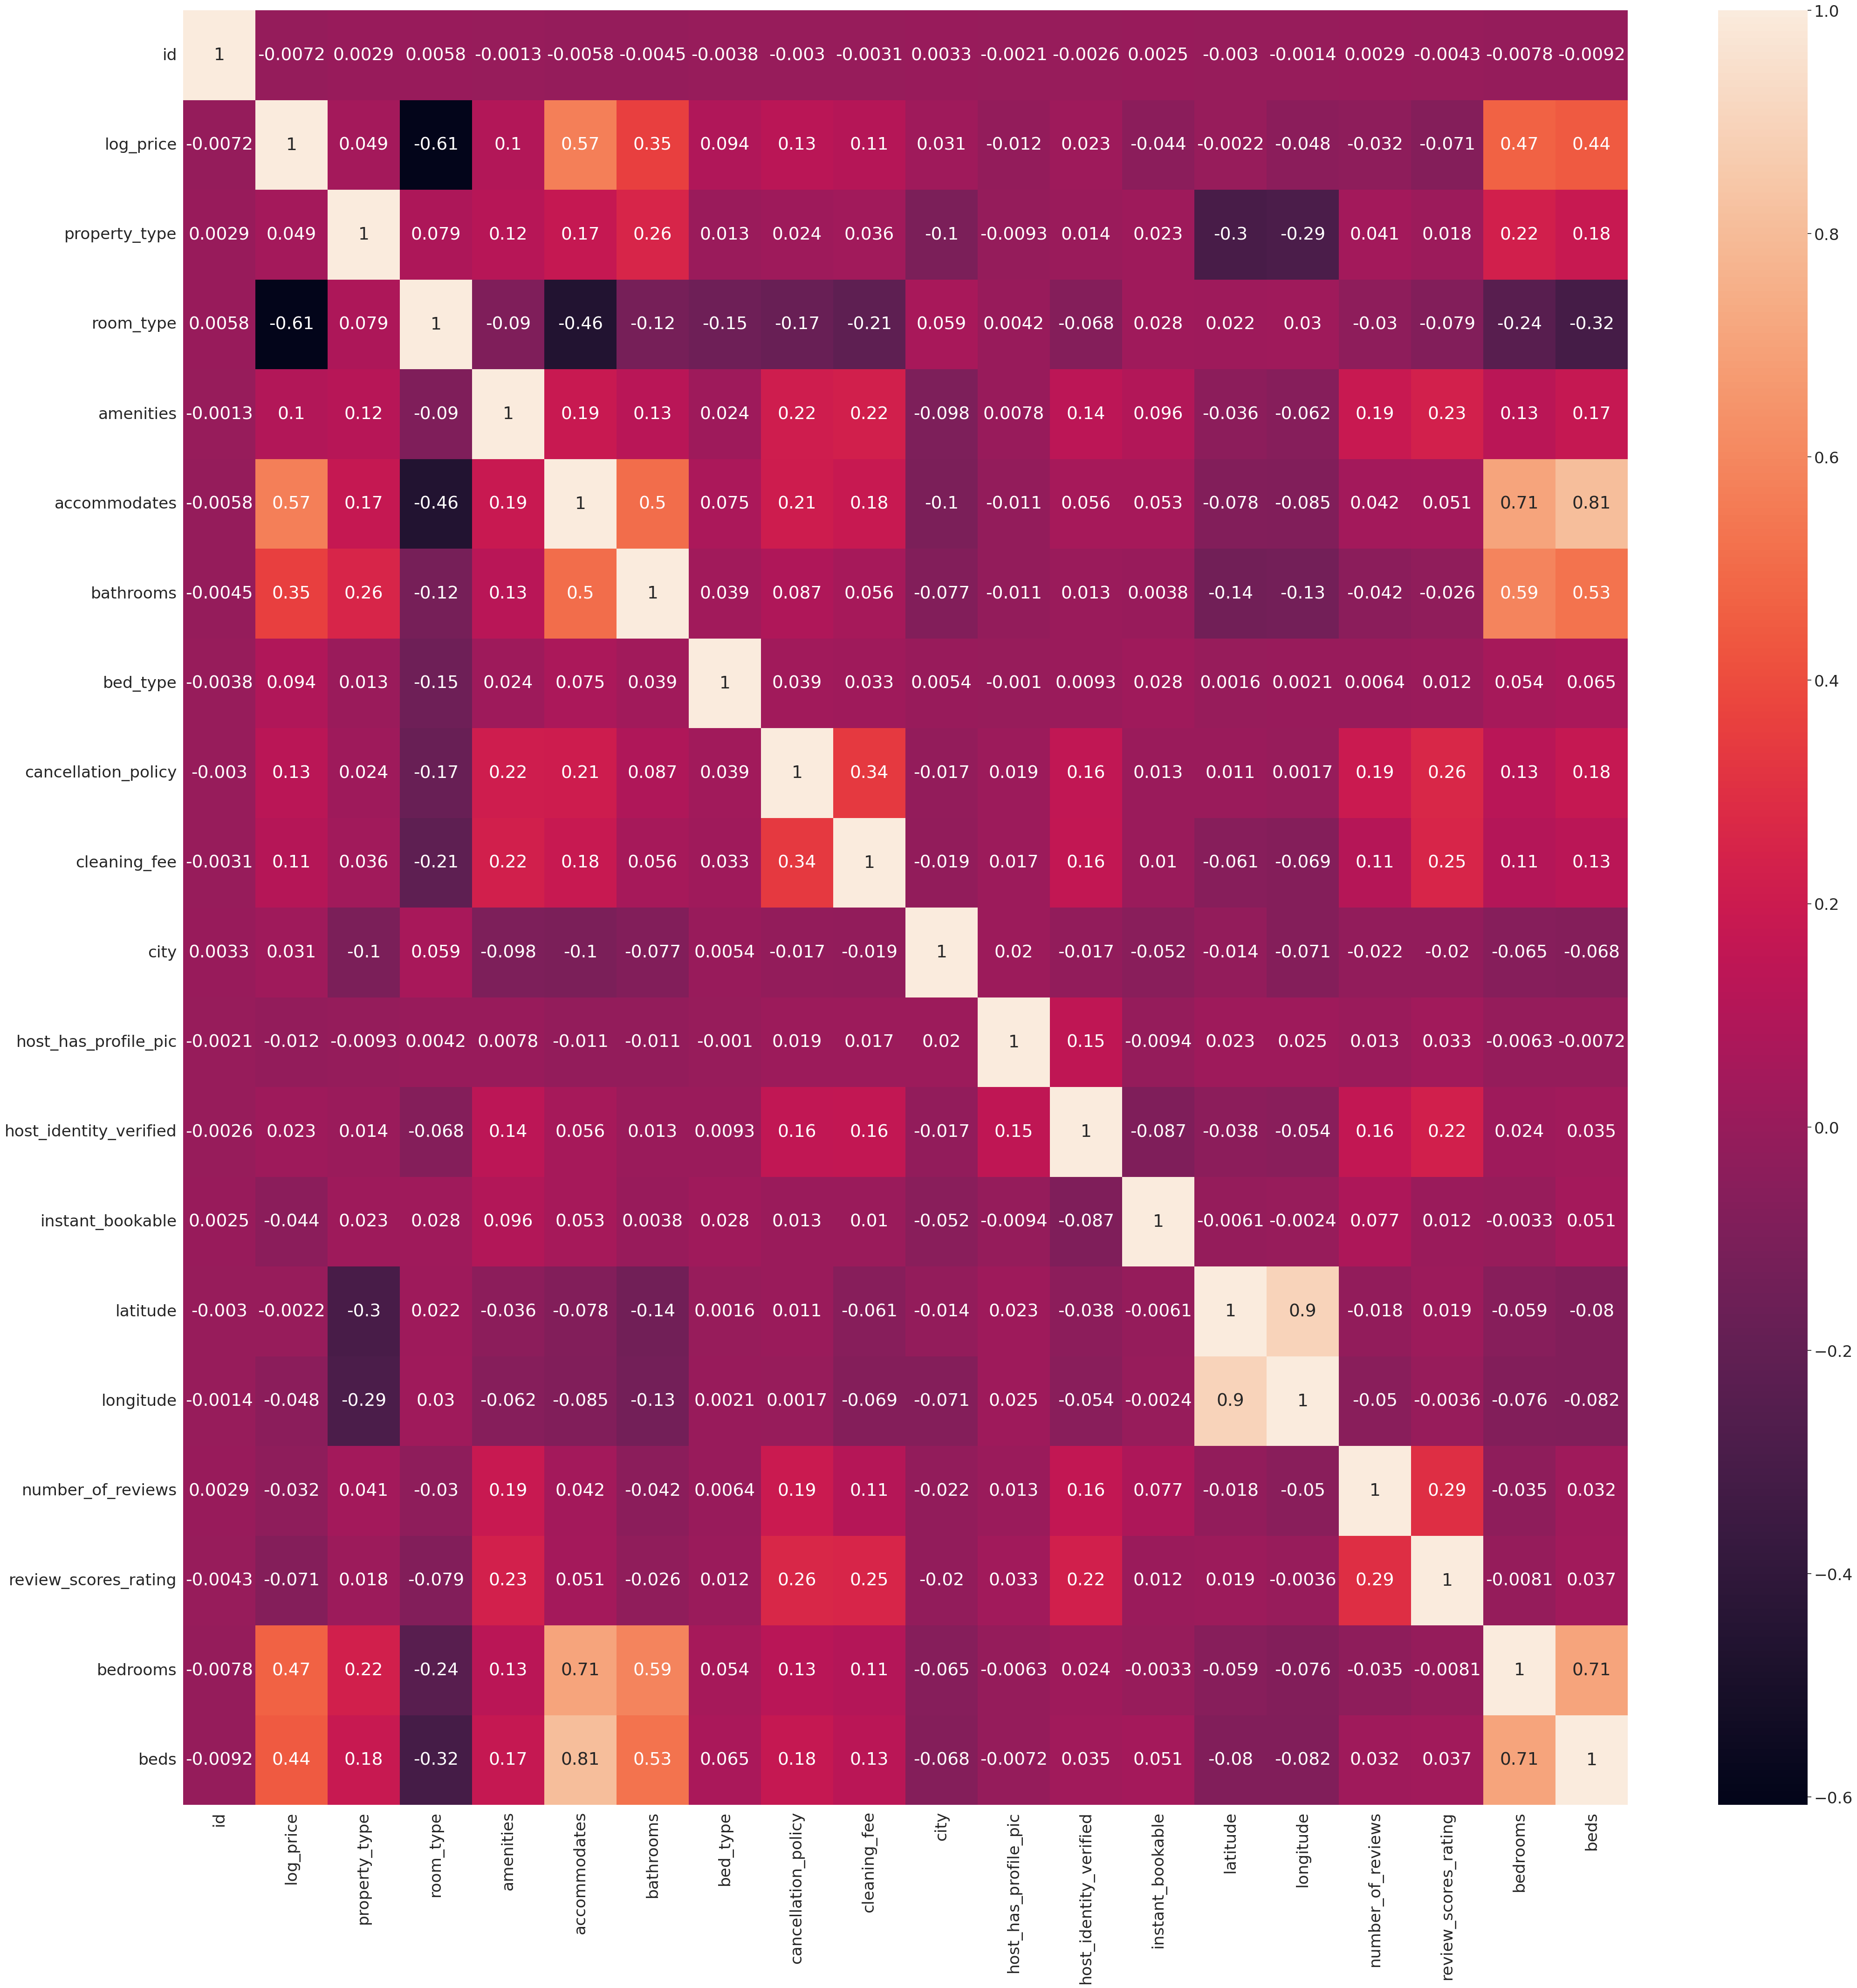

In [ ]:
sns.set(font_scale=2.25)
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True)
plt.savefig("heatmap_of_correlation_matrix.png")


<ipython-input-257-0dd71bb0edba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
<ipython-input-257-0dd71bb0edba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
<ipython-input-257-0dd71bb0edba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
<ipython-input-257-0dd71bb0edba>:7: FutureWarning: The default value of numeric_only 

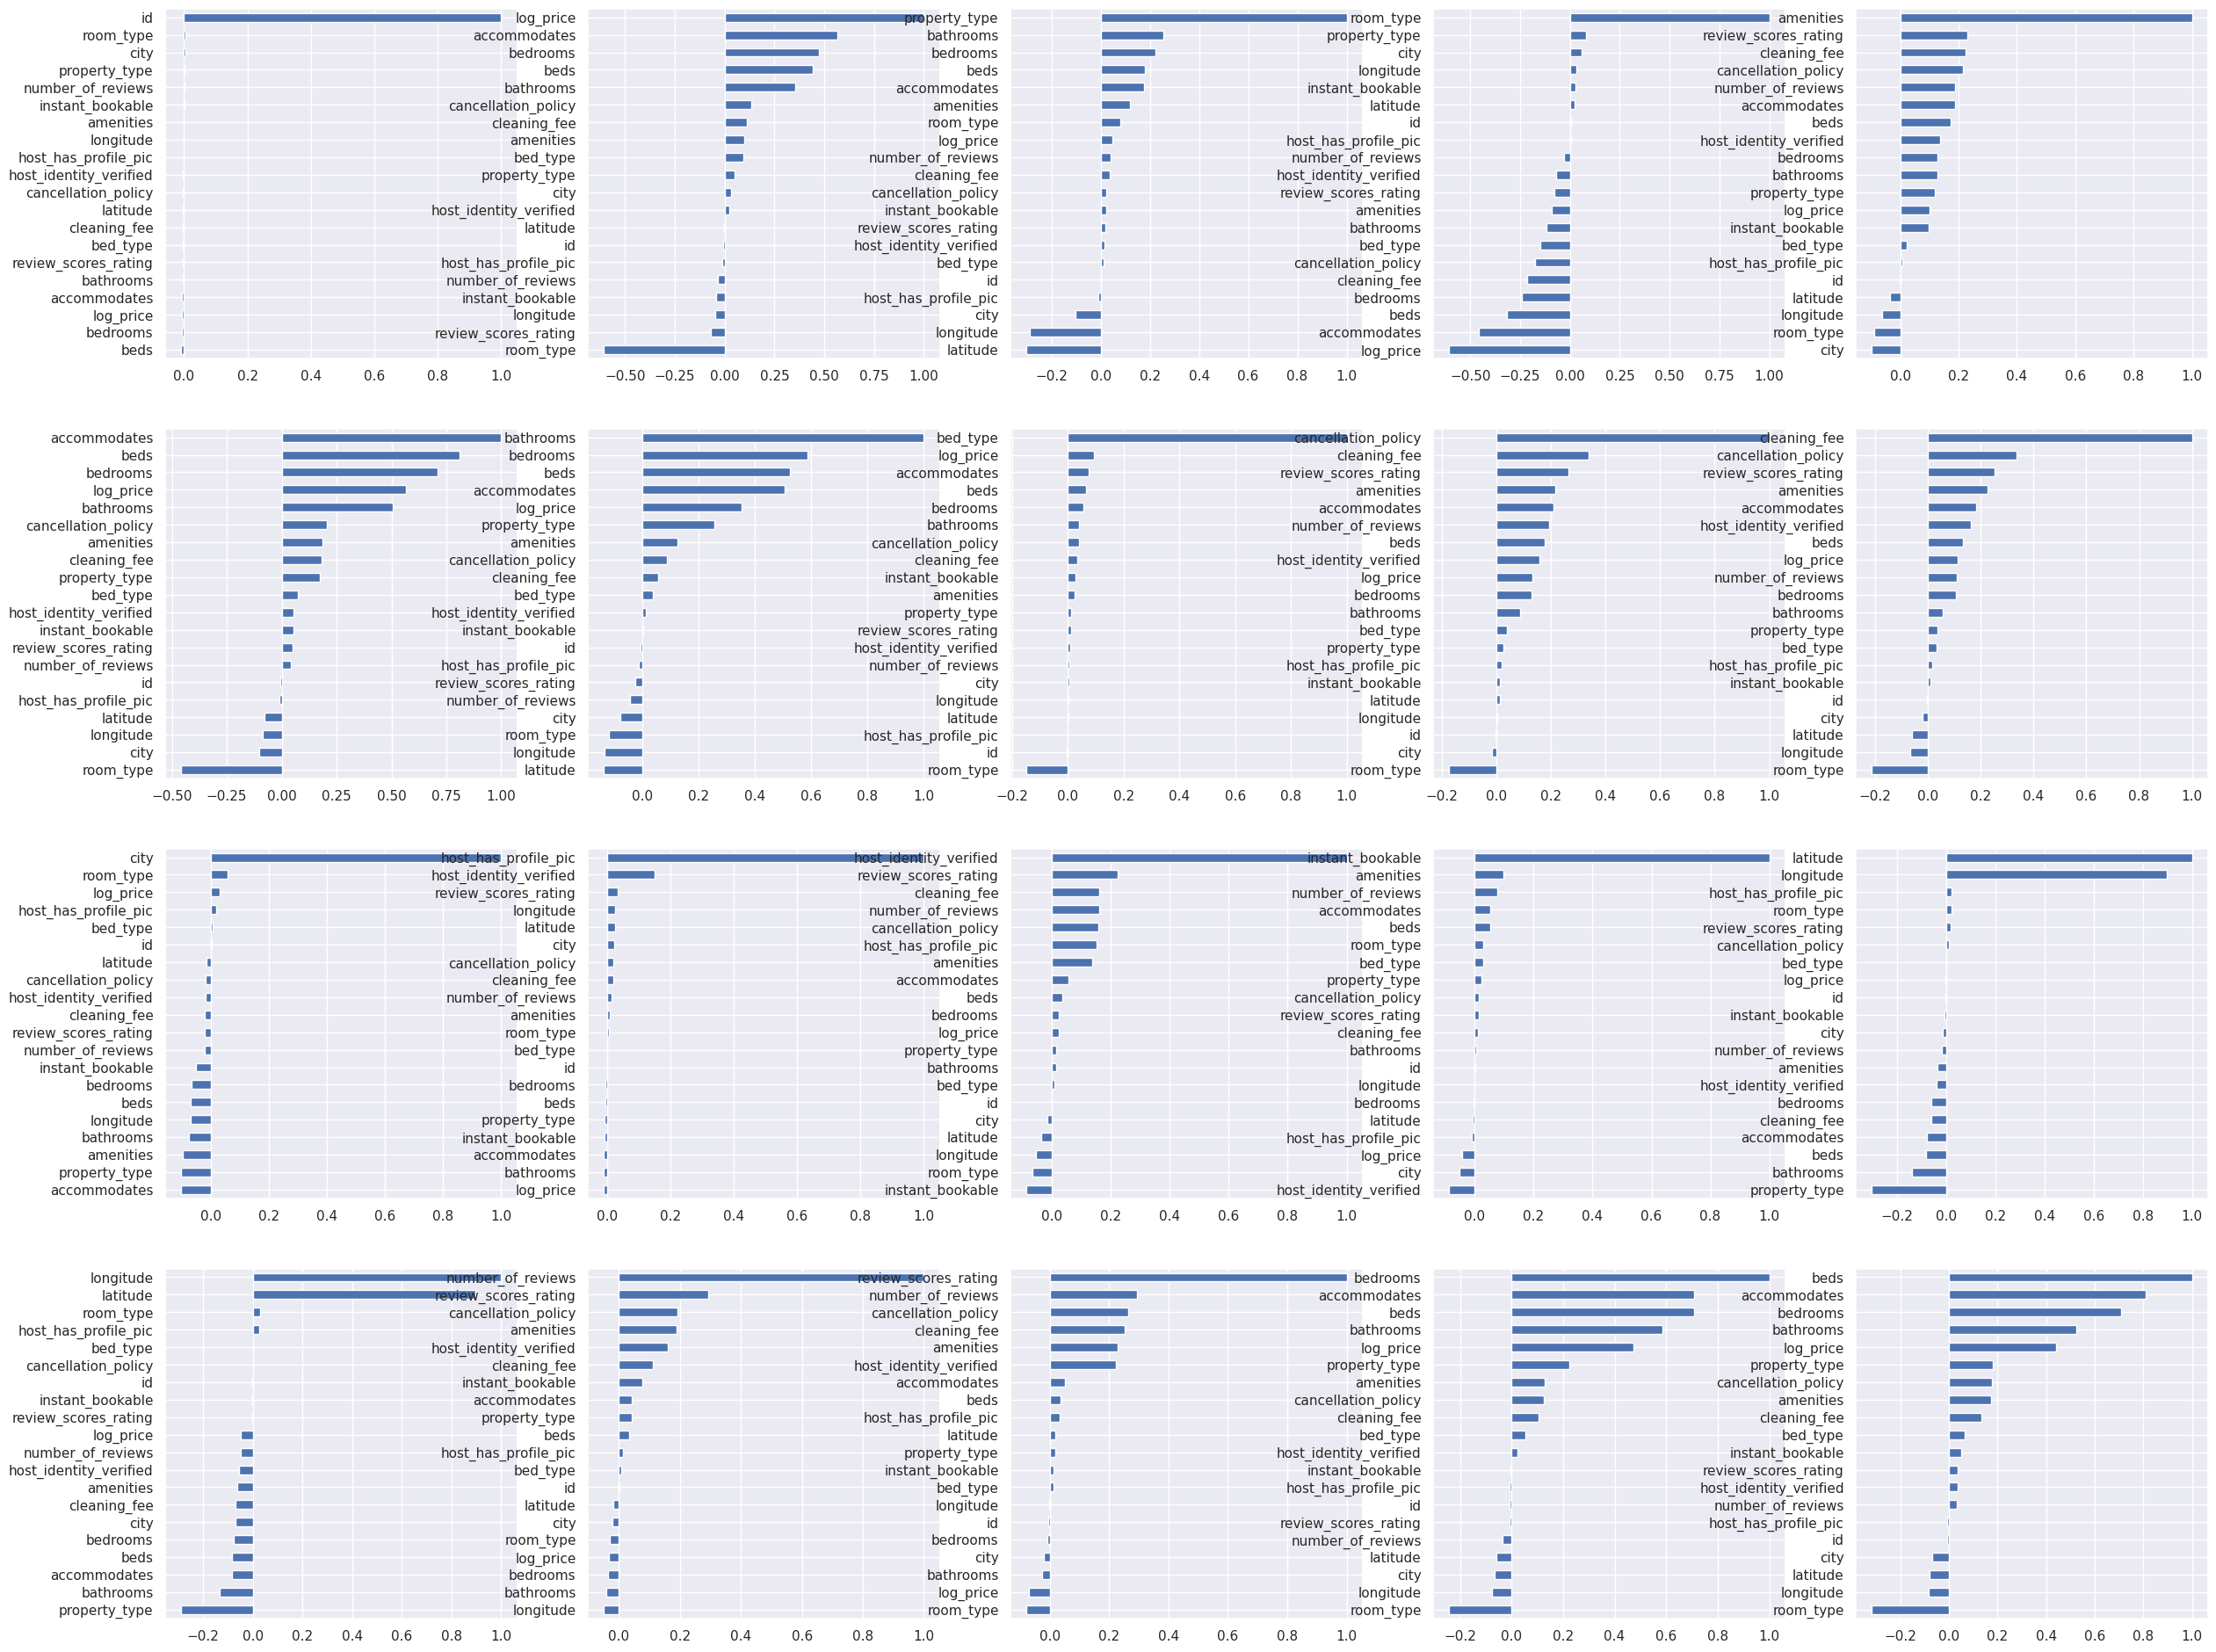

In [ ]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
i = 1
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        plt.subplot(5, 5, i)
        df.corr()[column].sort_values().plot(kind="barh")
        i += 1

<ipython-input-258-1fabeaa5bc6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["log_price"].sort_values().plot(kind="barh")


<Axes: >

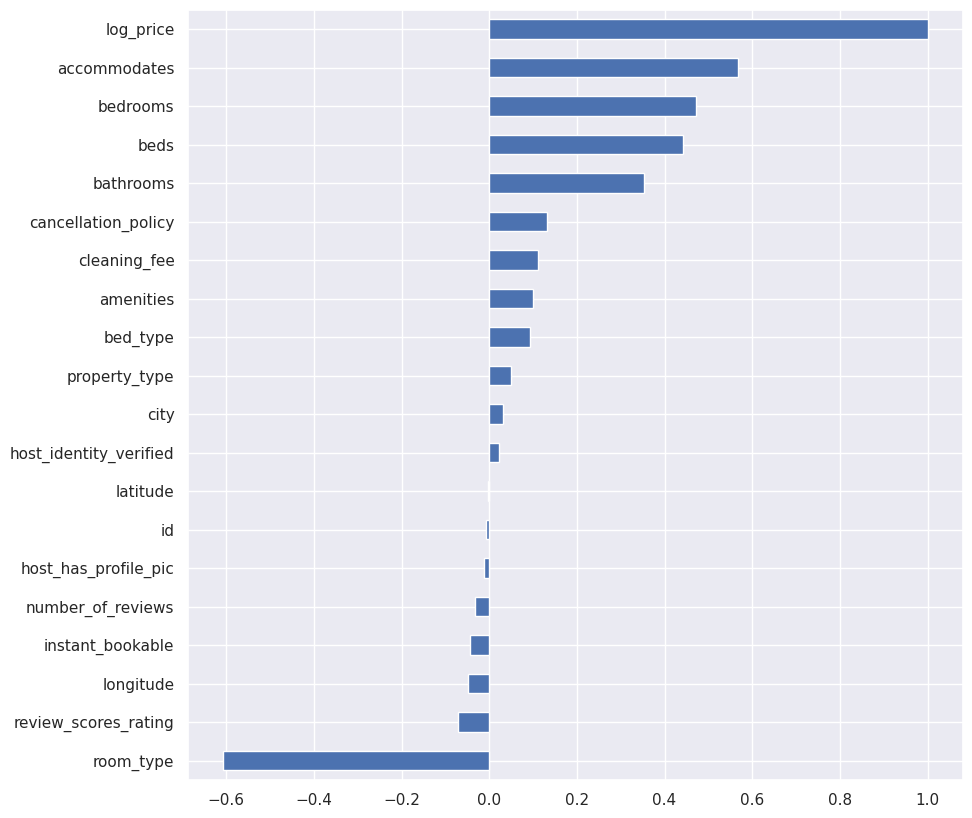

In [ ]:
plt.figure(figsize=(10,10))
df.corr()["log_price"].sort_values().plot(kind="barh")

In [ ]:
threshold = 0.5 # This is just an example value; adjust based on your context
y_train_binary = (y_train > threshold).astype(int)
logreg = LogisticRegression()
logreg.fit(X_train, y_train_binary)


LogisticRegression()

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 101, max_iter=1000)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined (features and target variable)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with RBF kernel
classifier = SVC(kernel='rbf')


